In [35]:
# Importing the libraries that we are gonna use
import pandas as pd
import matplotlib.pyplot as plt

# Load csv and depicting the first 5 rows
netflix_tv_shows_df = pd.read_csv('../Cleaning/netflix_titles_updated.csv')
netflix_tv_shows_df.head()

,show_id,type,title,director,country,date_added,release_year,age_rating,duration,listed_in,age_rating_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Parents Strongly Cautioned
1,s2,TV Show,Blood & Water,No Info,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,Mature Audiences
2,s2,TV Show,Blood & Water,No Info,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,Mature Audiences
3,s2,TV Show,Blood & Water,No Info,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,Mature Audiences
4,s3,TV Show,Ganglands,Julien Leclercq,No Info,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,Mature Audiences


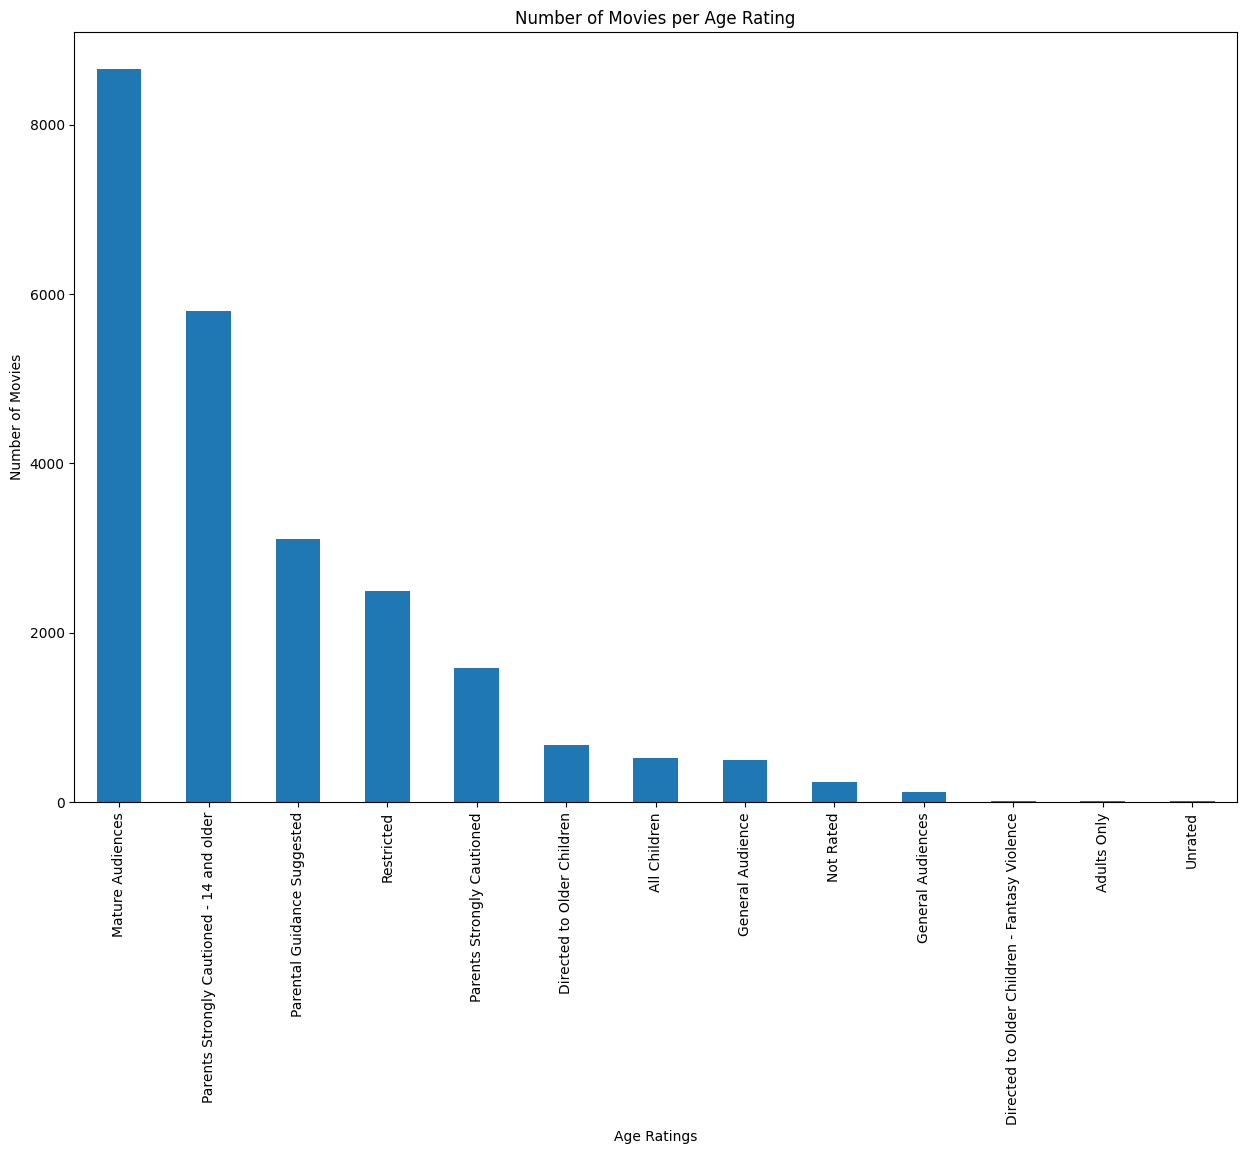

In [36]:
# Filter out specific age ratings
age_ratings_to_exclude = ['66 min', '74 min', '84 min', 'No Info']
netflix_tv_shows_filtered_df = netflix_tv_shows_df[~netflix_tv_shows_df['age_rating'].isin(age_ratings_to_exclude)]
rating_per_tv_show = netflix_tv_shows_filtered_df.groupby('age_rating_description')['title'].count()

# Sort values in descending order
rating_per_tv_show = rating_per_tv_show.sort_values(ascending=False)
rating_per_tv_show.plot(kind='bar', rot=90, figsize=(15, 10))
plt.xlabel('Age Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Age Rating')
plt.show()

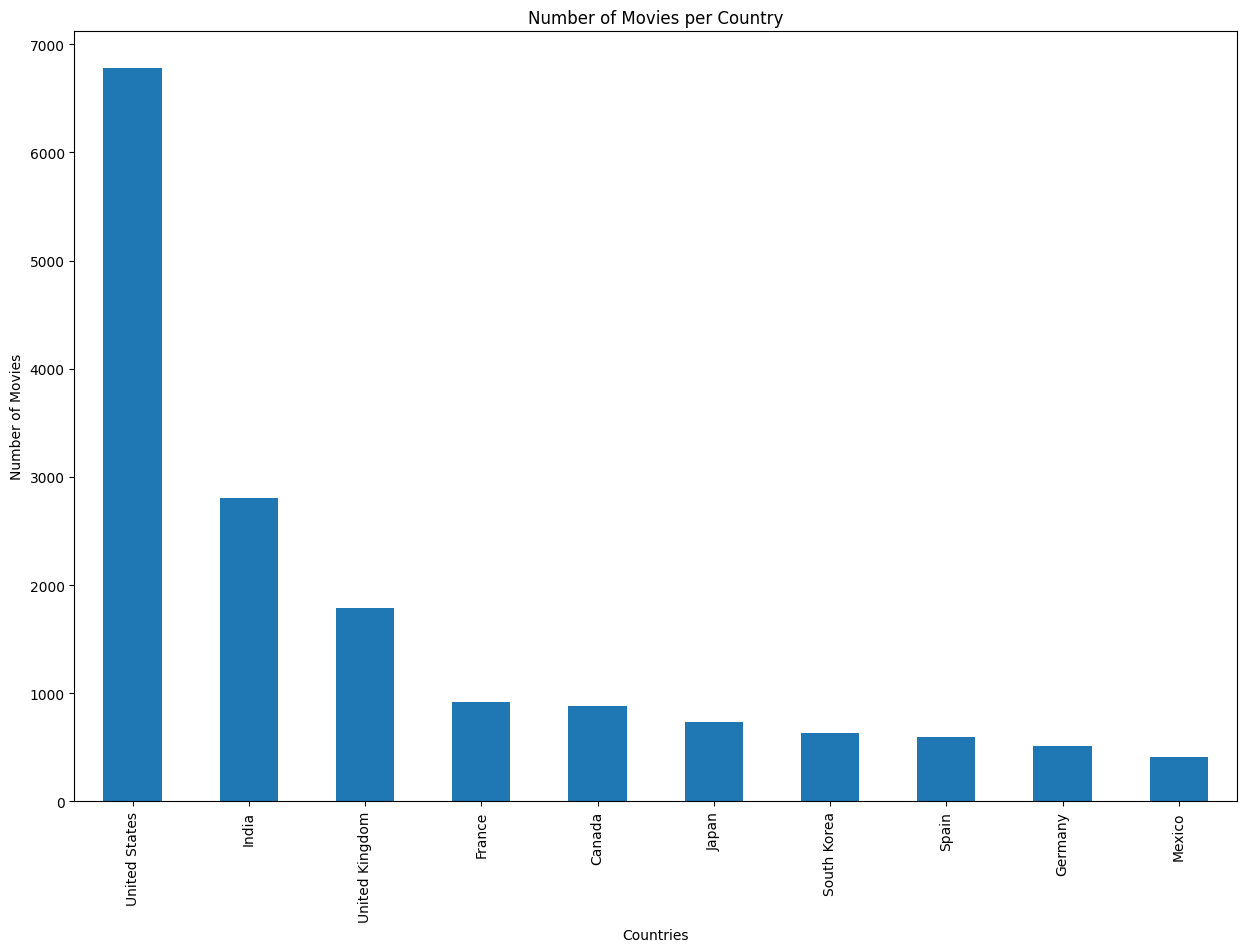

In [49]:
# Filter out specific countries
countries_to_exclude = ['No Info']
netflix_tv_shows_filtered_df = netflix_tv_shows_df[~netflix_tv_shows_df['country'].isin(countries_to_exclude)]
titles_per_country = netflix_tv_shows_filtered_df.groupby('country')['title'].count().nlargest(10)

# Sort values in descending order
titles_per_country = titles_per_country.sort_values(ascending=False)
titles_per_country.plot(kind='bar', rot=90, figsize=(15, 10))
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Country')
plt.show()

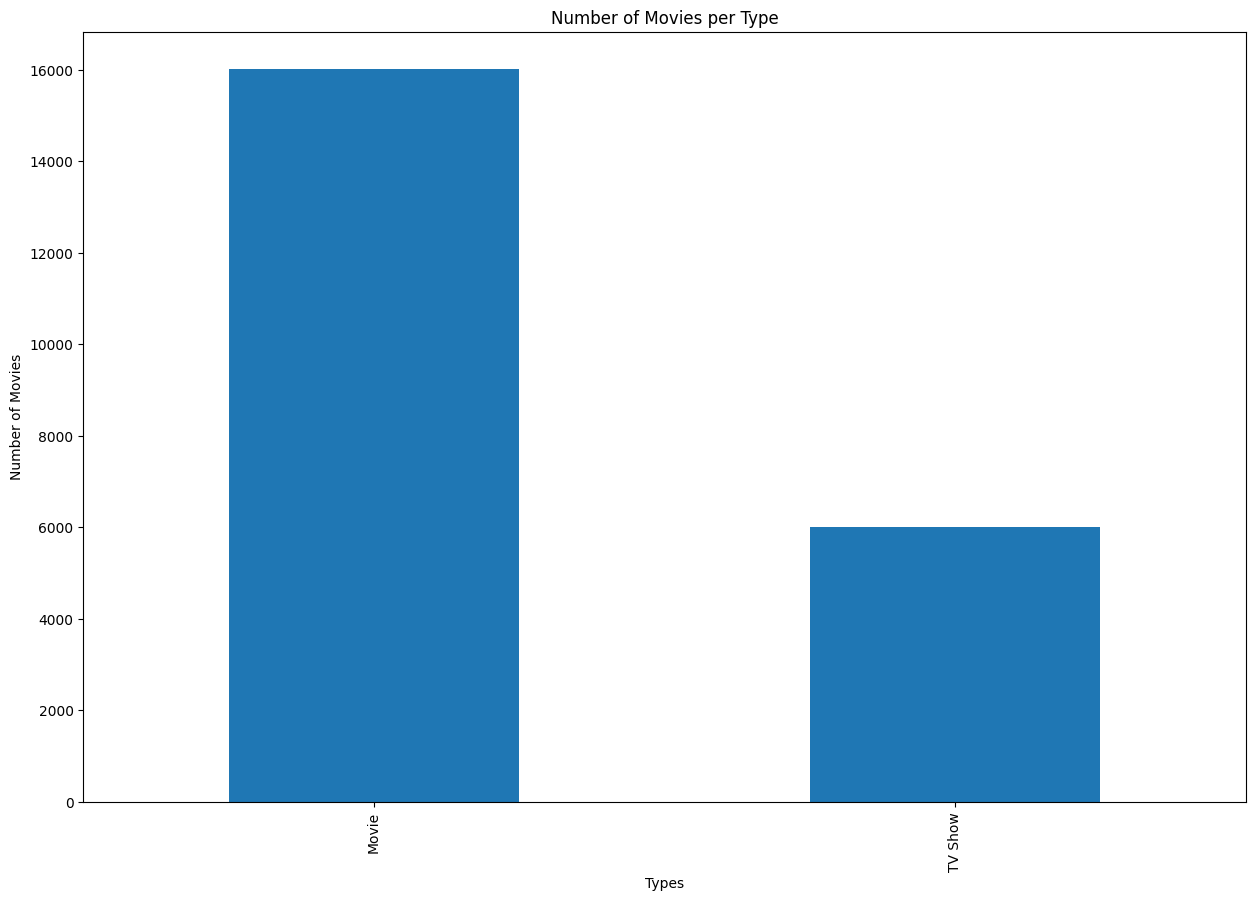

In [50]:
titles_per_type = netflix_tv_shows_filtered_df.groupby('type')['title'].count()

# Sort values in descending order
titles_per_type = titles_per_type.sort_values(ascending=False)
titles_per_type.plot(kind='bar', rot=90, figsize=(15, 10))
plt.xlabel('Types')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Type')
plt.show()

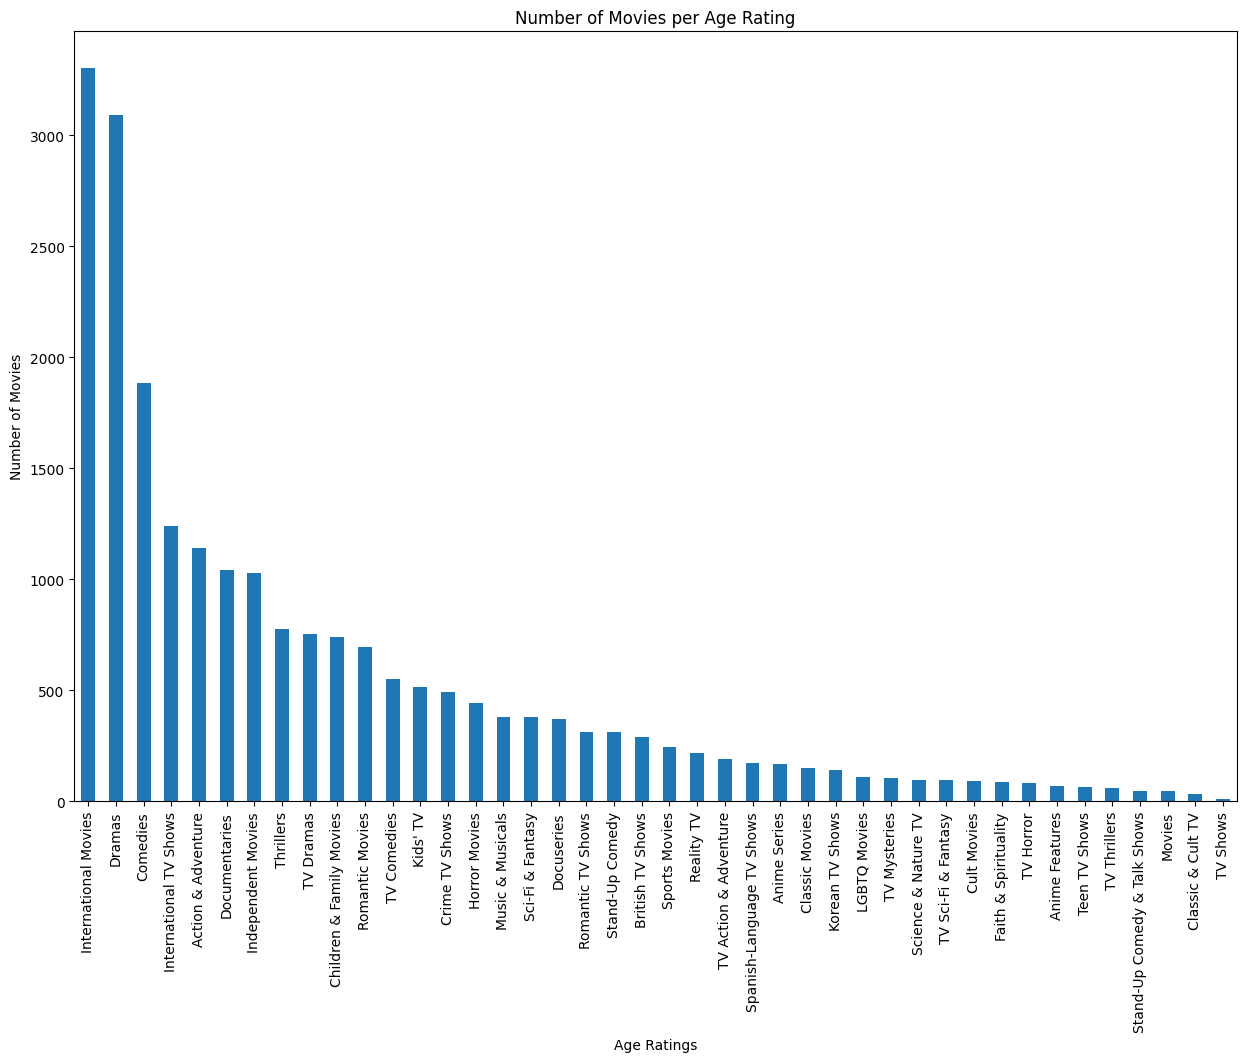

In [40]:
netflix_tv_shows_filtered_df['listed_in'].unique()
rating_per_tv_show = netflix_tv_shows_filtered_df.groupby('listed_in')['title'].count()

# Sort values in descending order
rating_per_tv_show = rating_per_tv_show.sort_values(ascending=False)
rating_per_tv_show.plot(kind='bar', rot=90, figsize=(15, 10))
plt.xlabel('Age Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Age Rating')
plt.show()

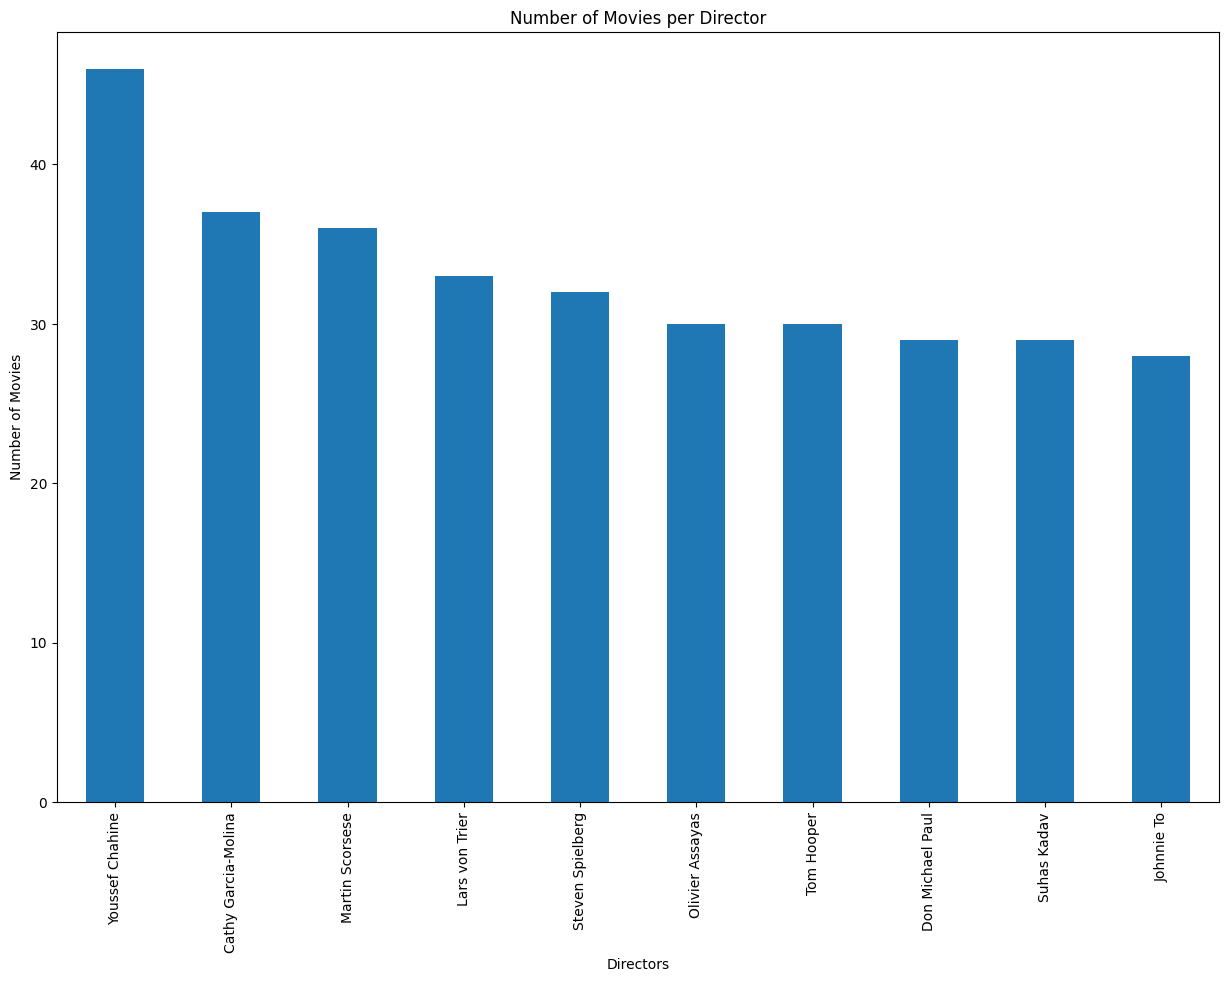

In [62]:
directors_to_exclude = ['No Info']
netflix_tv_shows_filtered_df = netflix_tv_shows_df[~netflix_tv_shows_df['director'].isin(directors_to_exclude)]
titles_per_director = netflix_tv_shows_filtered_df.groupby('director')['title'].count().nlargest(10)

# Sort values in descending order
titles_per_director = titles_per_director.sort_values(ascending=False)
titles_per_director.plot(kind='bar', rot=90, figsize=(15, 10))
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Director')
plt.show()

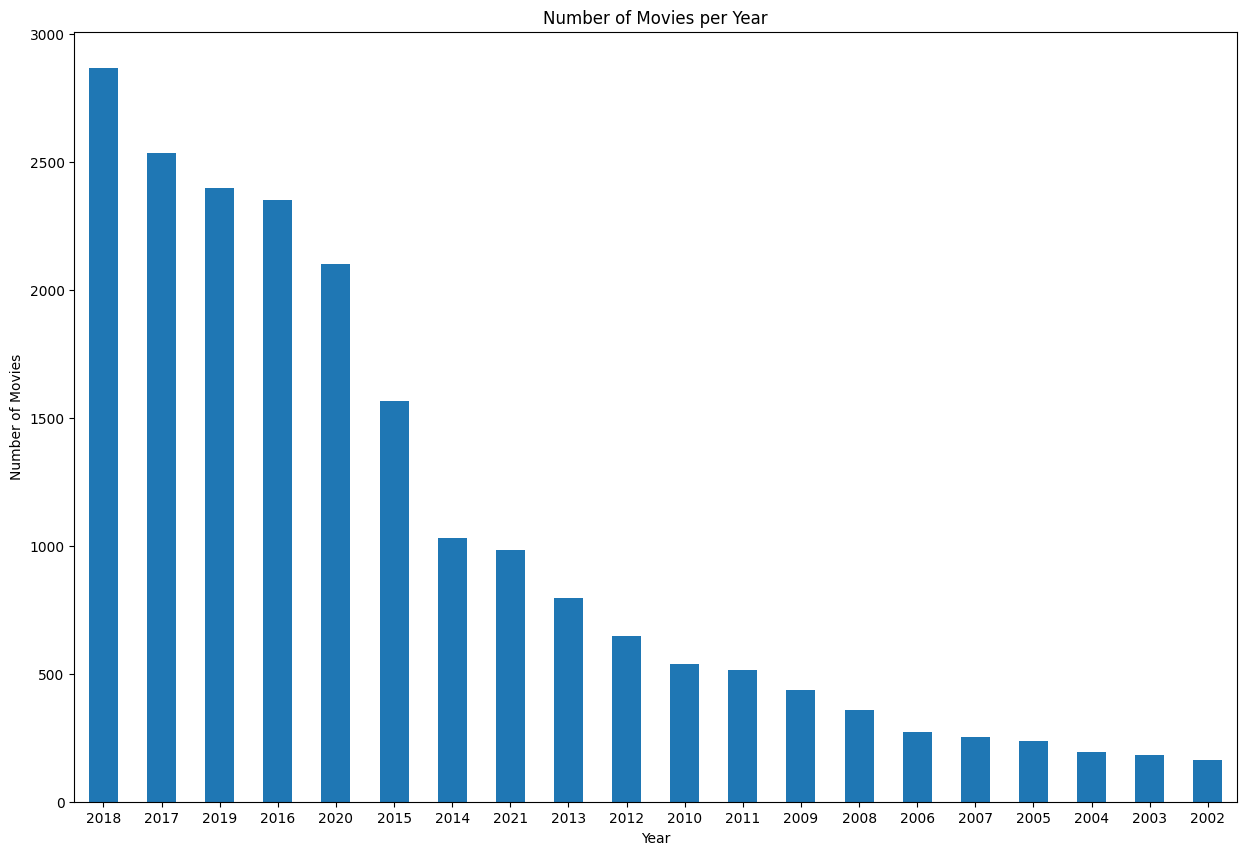

In [51]:
titles_per_year = netflix_tv_shows_filtered_df.groupby('release_year')['title'].count().nlargest(20)

# Sort values in descending order
titles_per_year = titles_per_year.sort_values(ascending=False)
titles_per_year.plot(kind='bar', rot=0, figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
plt.show()

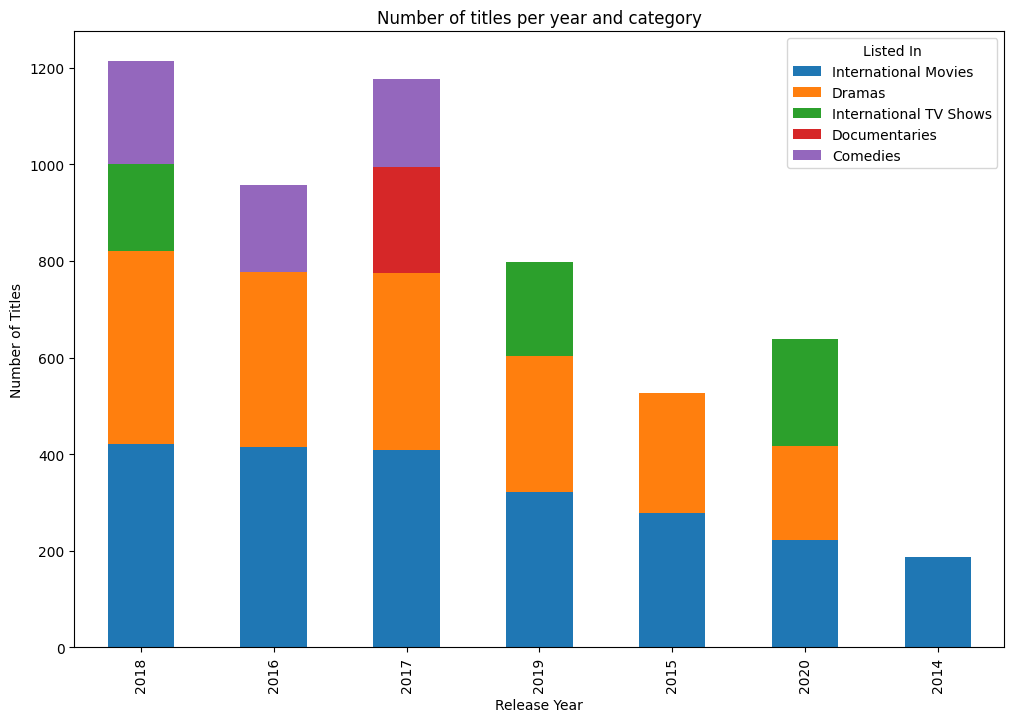

In [61]:
titles_per_year_per_category = netflix_tv_shows_filtered_df.groupby(['release_year', 'listed_in'])['title'].count().nlargest(20)
# Unstack the data for stacked bar plot
stacked_data = titles_per_year_per_category.unstack()

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of titles per year and category')
plt.legend(title='Listed In')
plt.show()